
### Combine csv and html to get the data with text and label

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import codecs
from string import punctuation
from collections import Counter

In [36]:
book_data = pd.read_csv('master996.csv',encoding = 'unicode_escape',sep = ';')

In [37]:
# remove '.epub' to get the book_id only
book_data['book_id'] = book_data['book_id'].apply(lambda x: x[0:(len(x)-5)])

In [38]:
book_data

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032,Literary,James| Henry
2,At Love's Cost,pg10379,Literary,Garvice| Charles
3,The Heart of the Range,pg10473,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812,Literary,Gallienne| Richard Le
...,...,...,...,...
991,David Copperfield,pg766DickensDavidCopfld,Literary,Dickens| Charles
992,Hard Times,pg786DickensHardTimes,Literary,Dickens| Charles
993,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk,Detective and Mystery,Connan| Doyle
994,The Mysterious Affair at Styles,pg863Agatha1,Detective and Mystery,Christie| Agatha


In [39]:
# create column "text" contains text from html file base on book_id
book_data['text'] = book_data['book_id'].apply(lambda x: codecs.open("Gutenberg_19th_century_English_Fiction/{}-content.html".format(x),encoding="utf8").read())

In [40]:
# remove some trailing character 
book_data['text'] = book_data['text'].apply(lambda x: x.replace('\n','').replace('<p>',' ').replace('\n<p>',''))
book_data.head()

,Book_Name,book_id,guten_genre,Author_Name,text
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067,Detective and Mystery,Stevenson| Burton Egbert,"A Detective Story A.B.M. Fellow-Sherlockian ""..."
1,The Pupil,pg1032,Literary,James| Henry,This edition first published 1916 The text fo...
2,At Love's Cost,pg10379,Literary,Garvice| Charles,"""Until this moment I have never fully realise..."
3,The Heart of the Range,pg10473,Western Stories,White| William Patterson,"""The Rider of Golden Bar,"" ""Hidden Trails,"" ""..."
4,The Worshipper of the Image,pg10812,Literary,Gallienne| Richard Le,The Worshipper of the Image Evening was in th...


In [41]:
from sklearn.preprocessing import LabelEncoder
import nltk

In [42]:
label = LabelEncoder()

In [43]:
book_data['class'] = label.fit_transform(book_data['guten_genre'])

In [44]:
X = book_data['text']
y = book_data['class']

In [45]:
label_text = book_data['guten_genre'].unique()
label_num = book_data['class'].unique()
class_num_text = dict(zip(label_num, label_text))
df = pd.DataFrame(data = y.value_counts()).reset_index().rename(columns={"index": "class", "class": "counts"})
df['class_name'] = df['class'].apply(lambda x: class_num_text[x])

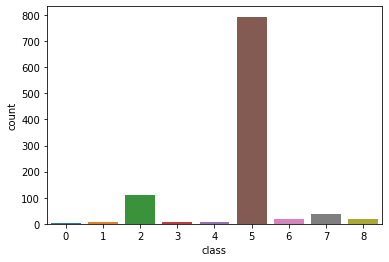

In [46]:
sns.countplot(y)
#### replace legend

# Sentence complexity


### Create comma_count and period_count column

In [47]:
comma = [',']
period = ['.']

In [48]:
def comma_count(text, character):
    counts = Counter(text)
    punctuation_counts = {k:v for k, v in counts.items() if k in character}
    return punctuation_counts.get(character[0])

In [49]:
book_data['comma_count'] = book_data['text'].apply(lambda x: comma_count(x,comma))

In [50]:
book_data['period_count'] = book_data['text'].apply(lambda x: comma_count(x,period))

### Coordination conjunction

In [51]:
coor_conj = ['and', 'but', 'for', 'nor', 'or', 'so', 'yet']

In [52]:
book_data['text'] = book_data['text'].str.lower()

In [53]:
def conj_punc_count(text,character):
    counts = Counter(text.split())
    conjunction_counts = {k:v for k, v in counts.items() if k in character}
    return sum(conjunction_counts.values())

In [54]:
book_data['coordinate_conj_count'] = book_data['text'].apply(lambda x: conj_punc_count(x,coor_conj))

### Other punctuation count

In [55]:
other_punctuation = '!"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'

In [56]:
book_data['other_punc_count'] = book_data['text'].apply(lambda x: conj_punc_count(x,other_punctuation))

### Average sentence length column

In [57]:
def averageSentence(sentence):
    words = sentence.split('.')
    average = sum(len(word) for word in words)/len(words)
    return round(average,0)

In [58]:
book_data['aver_sentence_length'] = book_data['text'].apply(lambda x: averageSentence(x))

In [59]:
book_data

,Book_Name,book_id,guten_genre,Author_Name,text,class,comma_count,period_count,coordinate_conj_count,other_punc_count,aver_sentence_length
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067,Detective and Mystery,Stevenson| Burton Egbert,"a detective story a.b.m. fellow-sherlockian ""...",2,5669.0,4367.0,3093,548,84.0
1,The Pupil,pg1032,Literary,James| Henry,this edition first published 1916 the text fo...,5,962.0,823.0,795,265,118.0
2,At Love's Cost,pg10379,Literary,Garvice| Charles,"""until this moment i have never fully realise...",5,11771.0,7137.0,8437,1966,112.0
3,The Heart of the Range,pg10473,Western Stories,White| William Patterson,"""the rider of golden bar,"" ""hidden trails,"" ""...",8,5798.0,7534.0,3519,684,64.0
4,The Worshipper of the Image,pg10812,Literary,Gallienne| Richard Le,the worshipper of the image evening was in th...,5,1429.0,864.0,986,229,110.0
...,...,...,...,...,...,...,...,...,...,...,...
991,David Copperfield,pg766DickensDavidCopfld,Literary,Dickens| Charles,i do not find it easy to get sufficiently far...,5,36118.0,18121.0,18721,2564,105.0
992,Hard Times,pg786DickensHardTimes,Literary,Dickens| Charles,the one thing needful murdering the innocents...,5,10397.0,5825.0,5252,636,97.0
993,Memoirs of Shelock Holmes,pg834DoyleMemoirsSherlk,Detective and Mystery,Connan| Doyle,"""i am afraid, watson, that i shall have to go...",2,6090.0,4950.0,3719,183,93.0
994,The Mysterious Affair at Styles,pg863Agatha1,Detective and Mystery,Christie| Agatha,the intense interest aroused in the public by...,2,4275.0,4595.0,2001,651,68.0
